In [46]:
from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np
import sys
import tensorflow as tf
import matplotlib.pyplot as plt

In [47]:
(xTrain, yTrain), (xTest, yTest) = mnist.load_data()

In [48]:
print(xTrain.shape, yTrain.shape)
print(xTest.shape, yTest.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


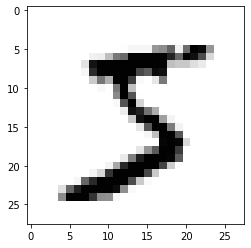

In [49]:
# 이미지 데이터 그리기
# 각 픽셀이 밝기의 정도에 따라서 0~255까지의 숫자로 채워져있음
plt.imshow(xTrain[0], cmap='Greys')
plt.show()

In [50]:
# 실제 숫자로 확인
for x in xTrain[0]:
    for i in x:
        sys.stdout.write("%d\t" % i)
    sys.stdout.write("\n")

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	
0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	
0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	
0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	81	240	253	253	119	25	0	0	0	0	0	0	0	0	0	


In [51]:
# reahpe, type설정, 정규화
xTrain = xTrain.reshape(xTrain.shape[0],784).astype('float32')/255
xTest = xTest.reshape(xTest.shape[0],784).astype('float32')/255

In [52]:
# label 데이터 one-hot encoding
yTrain = np_utils.to_categorical(yTrain,10)
yTest = np_utils.to_categorical(yTest, 10)

In [53]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping
import os

In [54]:
# 모델 구성
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [55]:
# 모델 환경 설정
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [56]:
# 모델 최적화
modelDir = './myModel/' # ./ -> 현재 디렉토리
if not os.path.exists(modelDir):
    modelPath = "./myModel/{epoch:02d}-{val_loss:.4f}.hdf5"
    os.mkdir(modelDir)
# ModelCheckpoint 콜백 함수 : 학습할 때마다 중간중간 콜백함
# 매 epoch마다 모델이 저장됨
checkPoint = ModelCheckpoint(filepath=modelPath, monitor='val_losee', 
                             verbose=1, save_best_only=True)
earlyStop = EarlyStopping(monitor='val_loss', patience=10)

In [57]:
# 모델 생성
history = model.fit(xTrain, yTrain, validation_data=(xTest, yTest),
                 batch_size=200, epochs=30, callbacks=[earlyStop, checkPoint])

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 3s 48us/step - loss: 0.3042 - accuracy: 0.9144 - val_loss: 0.1524 - val_accuracy: 0.9581
Epoch 2/30
 2600/60000 [>.............................] - ETA: 2s - loss: 0.1452 - accuracy: 0.9662

C:\Users\chan\anaconda3\envs\tf15_py37\lib\site-packages\keras\callbacks\callbacks.py:707: RuntimeWarning: Can save best model only with val_losee available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


60000/60000 [==============================] - 2s 42us/step - loss: 0.1254 - accuracy: 0.9639 - val_loss: 0.1042 - val_accuracy: 0.9710
Epoch 3/30
60000/60000 [==============================] - 3s 43us/step - loss: 0.0835 - accuracy: 0.9757 - val_loss: 0.0875 - val_accuracy: 0.9722
Epoch 4/30
60000/60000 [==============================] - 3s 42us/step - loss: 0.0602 - accuracy: 0.9826 - val_loss: 0.0767 - val_accuracy: 0.9777
Epoch 5/30
60000/60000 [==============================] - 2s 40us/step - loss: 0.0464 - accuracy: 0.9868 - val_loss: 0.0716 - val_accuracy: 0.9778
Epoch 6/30
60000/60000 [==============================] - 2s 39us/step - loss: 0.0344 - accuracy: 0.9903 - val_loss: 0.0720 - val_accuracy: 0.9781
Epoch 7/30
60000/60000 [==============================] - 2s 38us/step - loss: 0.0273 - accuracy: 0.9930 - val_loss: 0.0622 - val_accuracy: 0.9805
Epoch 8/30
60000/60000 [==============================] - 2s 41us/step - loss: 0.0211 - accuracy: 0.9945 - val_loss: 0.0621 - val

In [36]:
# CNN으로 MNIST 모델 만들기

In [68]:
(xTrain, yTrain), (xTest, yTest) = mnist.load_data()

# reahpe, type설정, 정규화,
xTrain = xTrain.reshape(xTrain.shape[0],28,28,1).astype('float32')/255
xTest = xTest.reshape(xTest.shape[0],28,28,1).astype('float32')/255

# label 데이터 one-hot encoding
yTrain = np_utils.to_categorical(yTrain,10)
yTest = np_utils.to_categorical(yTest, 10)

In [69]:
# 모델 구성
from keras.layers import *

model = Sequential()
# Conv2D(필터개수, 필터크기, (행, 열, 흑백), 활성함수)
model.add(Conv2D(32, kernel_size=(3,3),
                 input_shape=(28,28,1), activation='relu'))
model.add(MaxPool2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten()) # 1차원으로 변경하는 함수
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

In [70]:
# 모델 환경 설정
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [71]:
# 모델 최적화
modelDir = './myCNNModel/' # ./ -> 현재 디렉토리
if not os.path.exists(modelDir):
    modelPath = "./myCNNModel/{epoch:02d}-{val_loss:.4f}.hdf5"
    os.mkdir(modelDir)
# ModelCheckpoint 콜백 함수 : 학습할 때마다 중간중간 콜백함
# 매 epoch마다 모델이 저장됨
checkPoint = ModelCheckpoint(filepath=modelPath, monitor='val_losee', 
                             verbose=1, save_best_only=True)
earlyStop = EarlyStopping(monitor='val_loss', patience=10)

In [72]:
# 모델 생성
history = model.fit(xTrain, yTrain, validation_data=(xTest, yTest),
                 batch_size=200, epochs=30, callbacks=[earlyStop, checkPoint])

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 18s 294us/step - loss: 0.4367 - accuracy: 0.8630 - val_loss: 0.0984 - val_accuracy: 0.9700
Epoch 2/30
  600/60000 [..............................] - ETA: 17s - loss: 0.1443 - accuracy: 0.9667

C:\Users\chan\anaconda3\envs\tf15_py37\lib\site-packages\keras\callbacks\callbacks.py:707: RuntimeWarning: Can save best model only with val_losee available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


60000/60000 [==============================] - 18s 293us/step - loss: 0.1314 - accuracy: 0.9628 - val_loss: 0.0634 - val_accuracy: 0.9796
Epoch 3/30
60000/60000 [==============================] - 18s 308us/step - loss: 0.0933 - accuracy: 0.9725 - val_loss: 0.0497 - val_accuracy: 0.9838
Epoch 4/30
60000/60000 [==============================] - 18s 293us/step - loss: 0.0736 - accuracy: 0.9783 - val_loss: 0.0416 - val_accuracy: 0.9865
Epoch 5/30
60000/60000 [==============================] - 17s 284us/step - loss: 0.0588 - accuracy: 0.9825 - val_loss: 0.0525 - val_accuracy: 0.9825
Epoch 6/30
60000/60000 [==============================] - 17s 287us/step - loss: 0.0493 - accuracy: 0.9850 - val_loss: 0.0445 - val_accuracy: 0.9869
Epoch 7/30
60000/60000 [==============================] - 18s 298us/step - loss: 0.0459 - accuracy: 0.9860 - val_loss: 0.0390 - val_accuracy: 0.9876
Epoch 8/30
60000/60000 [==============================] - 17s 290us/step - loss: 0.0414 - accuracy: 0.9872 - val_loss

In [76]:
history.history

KeyError: 0

In [ ]:
# model.save('모델파일명.h5')
from keras.models import load_model

model = load_model('모델파일명.h5')
model.summary()
model.predict_classes()

In [86]:
dir([1,2,3])
it = [1,2,3].__iter__()
it.__next__()
it.__next__()
it.__next__()

3

In [97]:
class MyCounter:
    def __init__(self, stop):
        self.current = 0
        self.stop = stop

    def __getitem__(self, index):
        if index < self.stop:
            return index
        else:
            raise StopIteration
        
#     def __iter__(self):
#         return self
    
#     def __next__(self):
#         if self.current < self.stop:
#             res = self.current
#             self.current += 1
#             return res
#         else :
#             raise StopIteration
        
        
for i in MyCounter(5):
    print(i)

0
1
2
3
4


In [99]:
MyCounter(3)[0]

0

In [101]:
list(MyCounter(3))

[0, 1, 2]

In [118]:
import random
# iter(객체, 반복을 끝낼 값)
it = iter(lambda : random.randint(0,5),2)
next(it)

5

In [121]:
def myGen():
    yield 0
    yield 1
    yield 2

In [122]:
for i in myGen():
    print(i)

0
1
2


In [125]:
from keras.preprocessing.image import ImageDataGenerator

trainDataGen = ImageDataGenerator(rescale=1./255)
trainDataGen.flow_from_directory(
    './ImageGenerator/train', target_size=(24,24),
    batch_size=3, class_mode='categorical'
)

Found 45 images belonging to 3 classes.


In [127]:
testDataGen = ImageDataGenerator(rescale=1./255)
testDataGen.flow_from_directory(
    './ImageGenerator/test', target_size=(24,24),
    batch_size=3, class_mode='categorical'
)

Found 15 images belonging to 3 classes.


In [131]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3),
                activation='relu',input_shape=(24,24,3)))
model.add(Conv2D(64, kernel_size=(3,3),
                activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [134]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 22, 22, 32)        896       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 20, 20, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_21 (Dense)             (None, 128)               819328    
_________________________________________________________________
dense_22 (Dense)             (None, 3)                 387       
Total params: 839,107
Trainable params: 839,107
Non-trainable params: 0
_______________________________________________

In [135]:
model.compile(loss='categorical_crossentropy',
             optimizer='Adam',
             metrics=['accuracy'])

In [137]:
# 제너레이터로 생성된 데이터 학습은 별도로 존재
# fit_generator() 를 사용해서 학습해야한다.
model.fit_generator(
    trainDataGen,
    steps_per_epoch=15,
    epochs=50,
    validation_data=testDataGen,
    validation_steps=5
)

TypeError: object of type 'ImageDataGenerator' has no len()

NameError: name 'urlencode' is not defined